# Perceptron multicouche MLP

In [2]:
import pandas as pd

In [4]:
#Chargement du data

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df=pd.read_csv(url,header=None)


In [5]:
print(df.shape)
print(df.head())

(306, 4)
    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1


# Statistiques et graphiques

In [6]:
import matplotlib.pyplot as plt

                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


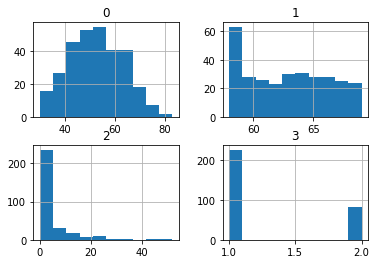

In [7]:
print(df.describe())
#histogrammes plot
df.hist()
plt.show()

In [9]:
from collections import Counter

#Définir les columns names
columns=["age","year","nodes","class"]

#load le csv en dataframe
dataframe=pd.read_csv(url,header=None,names=columns)

#Résumer la distributoin des classes
target=dataframe["class"].values
counter=Counter(target)
for k,v in counter.items():
    per=v/len(target)*100
    print(f"Classe : {k}, Count : {v}, Pourcentage : {per:.3f} %")

Classe : 1, Count : 225, Pourcentage : 73.529 %
Classe : 2, Count : 81, Pourcentage : 26.471 %


In [87]:
dataframe.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [11]:
#SPlit into input and output columns
X,y=df.values[:,:-1],df.values[:,-1]

In [12]:
#Vérifier si variables entrées sont float
X=X.astype("float32")
y=LabelEncoder().fit_transform(target)

In [37]:
#split train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,stratify=y,random_state=3)
#détermine le nombres de features
n_features=X.shape[1]

In [14]:
#définir modèle
model=Sequential(
    [Dense(units=10,activation="relu",kernel_initializer="he_normal", input_shape=(n_features,)),
    Dense(activation="relu",units=300,kernel_initializer="he_uniform",name="model_hidden2"), #units=nbr de neurones
    Dense(activation="relu",units=200,kernel_initializer="he_uniform",name="model_hidden2_1"),
    Dense(units=1,activation="sigmoid")]
)

In [15]:
#Compile le modèle

model.compile(loss="binary_crossentropy",
              optimizer="adam",               
              metrics=["accuracy"]
              )

In [16]:
#fit model
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=30,verbose=0)

In [17]:
#predict test set

yhat=model.predict(X_test)
#model.predict_proba(X_test)
#model.score(X_test,y_test)

In [18]:
#evaluer prediction
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)
print(f"Train ; {train_acc}, Test: {test_acc}")

5/5 [==============================] - 0s 1ms/step - loss: 1.6194 - accuracy: 0.7124
Train ; 0.8235294222831726, Test: 0.7124183177947998


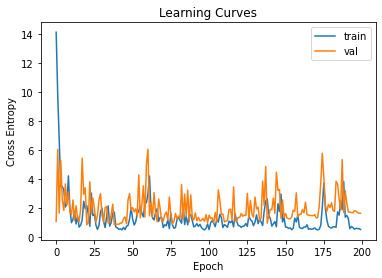

In [19]:
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()
plt.show()

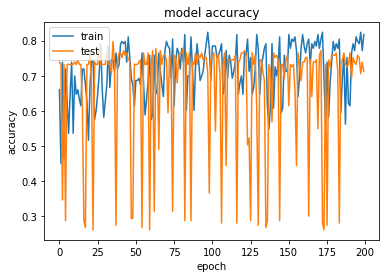

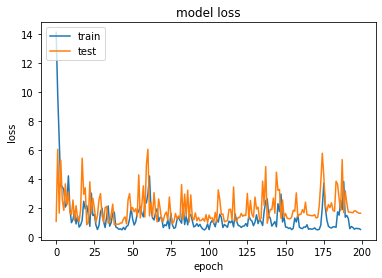

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [64]:
print(X_train.shape)

(153, 3)


In [124]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras.layers import *
from keras.models import *
from time import time
from keras.utils.tf_utils import set_random_seed
from numpy.random import seed
import tensorflow

In [77]:
n_features = X_train.shape[1]

In [150]:
#fonction pour créer model, requit pour KerasClassifier

def create_model(activation="relu", optimizer="adam", lyrs=[1],loss="mean_squared_error",dr=0.2):
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=n_features, activation=activation))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    
    model.compile(loss=loss, 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model


In [155]:
#Choix pour chaque paramètre
activation = ["relu", "sigmoid"]
optimizer = ["adam", "adagrad","RMSprop","SGD","Adadelta","Ftrl"]
unit = [[1,8],[8],[10],[10,5],[12,6],[12,8,4]]
loss=["sparse_categorical_crossentropy","mean_squared_error",]
drops = [0.0,1.0]
nb_epoch = [10, 600]
batch_size = [1,20]


In [156]:
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_8560/2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [157]:
params = dict(activation=activation, 
                  optimizer=optimizer, 
                  lyrs=unit,
                  loss=loss,
                  dr=drops,
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid_result=grid.fit(X_train,y_train)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [158]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'activation': 'relu', 'batch_size': 1, 'dr': 0.0, 'loss': 'mean_squared_error', 'lyrs': [8], 'nb_epoch': 10, 'optimizer': 'Ftrl'}
0.7383333444595337


In [159]:
model=create_model(activation="relu", optimizer="Ftrl", lyrs=[8],loss="mean_squared_error",dr=0.0)

In [160]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=600, batch_size=1, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 0s/step - loss: 0.2278 - accuracy: 0.7386

accuracy: 73.86%


In [163]:
#Sauvegarde du model
model = create_model(activation=grid_result.best_params_['activation'], 
                     
                     dr=grid_result.best_params_['dr'],
                      loss=grid_result.best_params_['loss'],
                     lyrs=grid_result.best_params_['lyrs'],
                   optimizer=grid_result.best_params_['optimizer']
                   )

In [164]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [165]:
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 80.65%


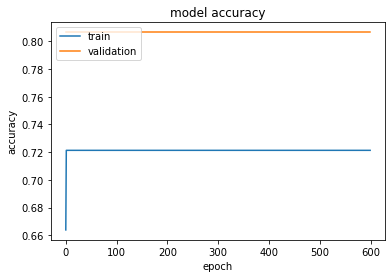

In [166]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()